In [1]:
%matplotlib inline

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score 
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier

In [3]:
train = pd.read_csv("./data/jc1c2/train.csv")
test = pd.read_csv("./data/jc1c2/test.csv")

In [4]:
train.shape

(189697, 42)

In [5]:
test.shape

(59762, 41)

In [6]:
y = train['income']

In [7]:
del train['income']

In [8]:
data= pd.concat([train,test],axis=0)
del data['ID']

In [9]:
data.reset_index(drop=True,inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249459 entries, 0 to 249458
Data columns (total 40 columns):
age                                           242985 non-null float64
class of worker                               248584 non-null object
detailed industry recode                      249350 non-null float64
detailed occupation recode                    249459 non-null int64
education                                     248803 non-null object
wage per hour                                 249459 non-null int64
enroll in edu inst last wk                    248897 non-null object
marital stat                                  249459 non-null object
major industry code                           248307 non-null object
major occupation code                         249244 non-null object
race                                          249283 non-null object
hispanic origin                               249459 non-null object
sex                                           244388 non-null

In [11]:
data.head()

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year
0,47.0,Federal government,31.0,4,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Utilities and sanitary services,Professional specialty,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52.0,95
1,26.0,Private,36.0,27,High school graduate,425,Not in universe,Never married,Private household services,Private household services,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,16.0,95
2,48.0,Self-employed-not incorporated,33.0,16,High school graduate,0,Not in universe,Married-civilian spouse present,Retail trade,Sales,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,50.0,95
3,8.0,Not in universe,0.0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0.0,95
4,51.0,Private,8.0,26,Some college but no degree,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Adm support including clerical,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52.0,95


In [12]:
## 결측치 확인
data.isnull().sum()

age                                            6474
class of worker                                 875
detailed industry recode                        109
detailed occupation recode                        0
education                                       656
wage per hour                                     0
enroll in edu inst last wk                      562
marital stat                                      0
major industry code                            1152
major occupation code                           215
race                                            176
hispanic origin                                   0
sex                                            5071
member of a labor union                           0
reason for unemployment                         421
full or part time employment stat              1548
capital gains                                   424
capital losses                                    0
dividends from stocks                          1243
tax filer st

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249459 entries, 0 to 249458
Data columns (total 40 columns):
age                                           242985 non-null float64
class of worker                               248584 non-null object
detailed industry recode                      249350 non-null float64
detailed occupation recode                    249459 non-null int64
education                                     248803 non-null object
wage per hour                                 249459 non-null int64
enroll in edu inst last wk                    248897 non-null object
marital stat                                  249459 non-null object
major industry code                           248307 non-null object
major occupation code                         249244 non-null object
race                                          249283 non-null object
hispanic origin                               249459 non-null object
sex                                           244388 non-null

In [14]:
for col in data.columns :
    if data[col].isnull().sum() == 0 :
        print(col)

detailed occupation recode
wage per hour
marital stat
hispanic origin
member of a labor union
capital losses
region of previous residence
state of previous residence
detailed household summary in household
migration code-change in msa
migration code-change in reg
migration code-move within reg
live in this house 1 year ago
migration prev res in sunbelt
num persons worked for employer
family members under 18
country of birth father
country of birth mother
country of birth self
citizenship
own business or self employed
fill inc questionnaire for veteran's admin
veterans benefits


In [15]:
for col in data.columns :
    if data[col].isnull().sum() != 0 :
        print(col)

age
class of worker
detailed industry recode
education
enroll in edu inst last wk
major industry code
major occupation code
race
sex
reason for unemployment
full or part time employment stat
capital gains
dividends from stocks
tax filer stat
detailed household and family stat
weeks worked in year
year


In [16]:
from tqdm import tqdm_notebook

def get_out(col):
    for row in tqdm_notebook(range(len(data))):
        if(pd.isnull(data.loc[row,col])):
            pass
        else:
            data.loc[row,col] = data.loc[row,col].strip()

for col in tqdm_notebook(data.columns):
    if (data[col].dtype == "object"):
        get_out(col)
    else:
        pass

for row in tqdm_notebook(range(len(data))):
    if(pd.isnull(data.loc[row,"class of worker"])):
        pass
    else:
        data["class of worker"][row] = data["class of worker"][row].replace(" ","")

data.to_csv("체크포인트.csv")

## 1. Age

#### 1. 연령대별 분류

In [17]:
data['age'].fillna(0, inplace = True)
data['age'].value_counts()

0.0     9890
34.0    4229
35.0    4196
33.0    4117
36.0    4070
        ... 
85.0     521
86.0     406
87.0     367
88.0     313
89.0     246
Name: age, Length: 91, dtype: int64

In [18]:
### 0~18 미성년, 18~25 청년, 26~39 중년, 40~59 중장년, 60~79 장년, 80~ 노년
age_bin = [0, 18, 25, 40, 60, 80, 100]
age_label = ['child','young','middle','prime','old','elder']
age_cats = pd.cut(data['age'], age_bin, labels = age_label)

In [19]:
age_cats.isnull().sum()

9890

#### 2. detailed household summary in household 칼럼 참조/ 결측치 채우기

In [20]:
### Child under 18 never married 면 child로 분류 
### Child under 18 ever married 또는 Child 18 or older 면 young로 분류
### 
for i in tqdm_notebook(range(len(data))) :
    if pd.isnull(age_cats[i]) :
        if data['detailed household summary in household'][i] == ' Child under 18 never married' :
            age_cats[i] = 'child'
        if data['detailed household summary in household'][i] == ' Child under 18 ever married' :
            age_cats[i] = 'child'
        if data['detailed household summary in household'][i] == ' Child 18 or older' :
            age_cats[i] = 'young'

#### 3. family members under 18 칼럼 참조/ child 채우기

In [21]:
data['education'].isnull().sum()

656

In [22]:
for i in tqdm_notebook(range(len(data))) :
    if pd.isnull(age_cats[i]) :
        if data['family members under 18'][i] != ' Not in universe' and not pd.isnull(data['family members under 18'][i]) :
            age_cats[i] = 'child'
        if data['education'][i] == ' Children' :
            age_cats[i] = 'child'
        if data['detailed household and family stat'][i] == ' Child <18 never marr not in subfamily' :
            age_cats[i] = 'child'
            
### 나이만 뽑고 나면 del 해서 칼럼 지워도 될듯??

In [23]:
data['marital stat'].isnull().sum()

0

In [24]:
## 1. marital stat이 widowed면  old로 분류  
## 2. Divorced면 middle
for i in tqdm_notebook(range(len(data))) :
    if pd.isnull(age_cats[i]) :
        if data['marital stat'][i] == ' Widowed' :
            age_cats[i] = 'old'
        if data['marital stat'][i] == '  Divorced' :
            age_cats[i] = 'prime'
        if data['marital stat'][i] == ' Married-civilian spouse present' :
            age_cats[i] = 'prime'
        if data['marital stat'][i] == ' Separated' :
            age_cats[i] = 'middle'
        if data['marital stat'][i] == ' Married-A F spouse present' :
            age_cats[i] = 'middle'

In [25]:
age_cats.value_counts()

child     72118
middle    58406
prime     58198
old       31646
young     22419
elder      5666
Name: age, dtype: int64

In [26]:
age_cats.isnull().sum()

1006

In [27]:
data['age'].mean()

33.7629951214428

In [28]:
for i in tqdm_notebook(range(len(data))) :
    if pd.isnull(age_cats[i]) :
        age_cats[i] = 'middle'

In [29]:
data["age_cats"] = age_cats
data['age_cats'].head()

0     prime
1    middle
2     prime
3     child
4     prime
Name: age_cats, dtype: category
Categories (6, object): [child < young < middle < prime < old < elder]

In [30]:
### 0~18 미성년, 18~25 청년, 26~39 중년, 40~59 중장년, 60~79 장년, 80~ 노년
for i in tqdm_notebook(range(len(data))) :
    if pd.isnull(data['age'][i]) :
        if data["age_cats"] == 'child' :
            data['age'][i] = 10
        elif data["age_cats"] == 'young' :    
            data['age'][i] = 22
        elif data["age_cats"] == 'middle' :
            data['age'][i] = 40
        elif data["age_cats"] == 'prime' :
            data['age'][i] = 55
        elif data["age_cats"] == 'old' :
            data['age'][i] = 70
        elif data["age_cats"] == 'elder' :
            data['age'][i] = 85

In [31]:
data['age'].isnull().sum()

0

## 2. Sex

In [32]:
data['sex'].isnull().sum()

5071

### 1. 남성(householder)
detailed household summary in household 칼럼 참조

In [33]:
data['detailed household summary in household'].value_counts()

 Householder                             95579
 Child under 18 never married            62216
 Spouse of householder                   51910
 Child 18 or older                       17962
 Other relative of householder           12062
 Nonrelative of householder               9513
 Group Quarters- Secondary individual      161
 Child under 18 ever married                56
Name: detailed household summary in household, dtype: int64

Householder 면서 동시에 Nonfamily householder가 아니면 남성
Spouse of householder 면 여성

In [34]:
from tqdm import tqdm_notebook
for i in tqdm_notebook(range(len(data))) :
    if not pd.isnull(data['sex'][i]) and data['sex'][i] !='?' :
        pass
    elif data['detailed household summary in household'][i] == ' Householder' \
    and data['detailed household and family stat'][i] != ' Nonfamily householder' :
        data['sex'][i] = ' Male'
    elif data['detailed household summary in household'][i] == ' Spouse of householder' :
        data['sex'][i] = ' Female'
data['sex'].value_counts()

 Female    127265
 Male      119025
?             444
Name: sex, dtype: int64

full or part time employment stat가 children or armed forces 이고 age_cats가 child이거나 age가 18세 미만이 아니면 남성

In [35]:
data['full or part time employment stat'].isnull().sum()

1548

In [36]:
for i in tqdm_notebook(range(len(data))) :
    if not pd.isnull(data['sex'][i]) and data['sex'][i] !='?' :
        pass
    elif data['full or part time employment stat'][i] == 'children or armed forces' and age_cats[i] == 'child' :
        data['sex'][i] = ' Male'
    elif data['full or part time employment stat'][i] == 'children or armed forces' and data['age'][i]>=18 :    
        data['sex'][i] = ' Male'

In [37]:
###  Not in labor force >> Female
for i in tqdm_notebook(range(len(data))) :
    if not pd.isnull(data['sex'][i]) and data['sex'][i] !='?' :
        pass
    elif data['full or part time employment stat'][i] == ' Not in labor force' :
        data['sex'][i] = ' Female'

In [38]:
data['major industry code'].isnull().sum()

1152

In [39]:
data['major industry code'].value_counts()

 Not in universe or children            124140
 Retail trade                            21305
 Manufacturing-durable goods             11347
 Education                               10504
 Manufacturing-nondurable goods           8634
 Finance insurance and real estate        7760
 Construction                             7516
 Business and repair services             7237
 Medical except hospital                  5899
 Public administration                    5772
 Other professional services              5704
 Transportation                           5304
 Hospital services                        4886
 Wholesale trade                          4563
 Agriculture                              3712
 Personal services except private HH      3642
 Social services                          3108
 Entertainment                            2058
 Communications                           1507
 Utilities and sanitary services          1488
 Private household services               1174
 Mining      

In [40]:
###  직업코드 분류 : 남성
for i in tqdm_notebook(range(len(data))) :
    if not pd.isnull(data['sex'][i]) and data['sex'][i] !='?' :
        pass
    elif data['major industry code'][i] == ' Armed Forces' :
        data['sex'][i] = ' Male'
    elif data['major industry code'][i] == ' Manufacturing-durable goods' :
        data['sex'][i] = ' Male'
    elif data['major industry code'][i] == ' Manufacturing-nondurable goods' :
        data['sex'][i] = ' Male'
    elif data['major industry code'][i] == ' Mining' :
        data['sex'][i] = ' Male'
    elif data['major industry code'][i] == ' Forestry and fisheries' :
        data['sex'][i] = ' Male'    
    elif data['major industry code'][i] == ' Construction' :
        data['sex'][i] = ' Male'
    elif data['major industry code'][i] == ' Business and repair services' :
        data['sex'][i] = ' Male'   
    elif data['major industry code'][i] == ' Utilities and sanitary services' :
        data['sex'][i] = ' Male'   
    elif data['major industry code'][i] == ' Transportation' :
        data['sex'][i] = ' Male'        
    elif data['major industry code'][i] == ' Finance insurance and real estate' :
        data['sex'][i] = ' Male'
    elif data['major industry code'][i] == ' Other professional services' :
        data['sex'][i] = ' Male'       

In [41]:
### 직업 코드 분류 : 여성
for i in tqdm_notebook(range(len(data))) :
    if not pd.isnull(data['sex'][i]) and data['sex'][i] !='?' :
        pass
    elif data['major industry code'][i] == ' Private household services' :
        data['sex'][i] = ' Female'
    elif data['major industry code'][i] == ' Social services' :
        data['sex'][i] = ' Female'    
    elif data['major industry code'][i] == ' Medical except hospital' :
        data['sex'][i] = ' Female'    
    elif data['major industry code'][i] == ' Education' :
        data['sex'][i] = ' Female'
    elif data['major industry code'][i] == ' Entertainment' :
        data['sex'][i] = ' Female'   
    elif data['major industry code'][i] == ' Personal services except private HH' :
        data['sex'][i] = ' Female'   
    elif data['major industry code'][i] == ' Medical except hospital' :
        data['sex'][i] = ' Female'   

In [42]:
data['sex'].value_counts()

 Female    127783
 Male      119440
?             302
Name: sex, dtype: int64

In [43]:
data['sex'].isnull().sum()

1934

In [44]:
##남은거 남자로 채움
for i in tqdm_notebook(range(len(data))) :
    if pd.isnull(data['sex'][i]) or data['sex'][i] =='?' :
        data['sex'][i] = ' Male'
data['sex'].isnull().sum()

0

## 3. race

In [45]:
data['race'].isnull().sum()

176

In [46]:
data['race'].value_counts()

 White                          209270
 Black                           25367
 Asian or Pacific Islander        7274
 Other                            4552
 Amer Indian Aleut or Eskimo      2820
Name: race, dtype: int64

In [47]:
### 엄마아빠 출신지 usa일경우 백인 아니면 흐긴
for i in tqdm_notebook(range(len(data))) :
    if not pd.isnull(data['race'][i]) :
        pass
    elif data['country of birth father'][i] == ' United-States' and data['country of birth mother'][i] == ' United-States' :
        data['race'][i] = ' White'
    else : 
        data['race'][i] = ' Black'

In [48]:
data['race'].isnull().sum()

0

## 4. class of worker

In [49]:
data['class of worker'].isnull().sum()

875

In [50]:
data['class of worker'].value_counts()

 Not in universe                   123730
 Private                            90359
 Self-employed-not incorporated     10655
 Local government                    9814
 State government                    5330
 Self-employed-incorporated          4304
 Federal government                  3668
 Never worked                         534
 Without pay                          190
Name: class of worker, dtype: int64

In [51]:
data['education'].value_counts()

 High school graduate                      60059
 Children                                  58272
 Some college but no degree                34722
 Bachelors degree(BA AB BS)                25345
 7th and 8th grade                         10008
 10th grade                                 9371
 11th grade                                 8588
 Masters degree(MA MS MEng MEd MSW MBA)     8533
 9th grade                                  7687
 Associates degree-occup /vocational        6634
 Associates degree-academic program         5449
 5th or 6th grade                           4100
 12th grade no diploma                      2687
 Prof school degree (MD DDS DVM LLB JD)     2418
 1st 2nd 3rd or 4th grade                   2223
 Doctorate degree(PhD EdD)                  1699
 Less than 1st grade                        1008
Name: education, dtype: int64

#### education 결측치 채우기

In [52]:
##일단 제일 많은걸루
data['education'].fillna(' High school graduate', inplace=True)

In [53]:
data['education'].isnull().sum()

0

In [54]:
## child나 elder, old 는 Not in universe 그 외 private
for i in tqdm_notebook(range(len(data))) :
    if not pd.isnull(data['class of worker'][i]) :
        pass
    elif data['age_cats'][i] == 'child' or data['age_cats'][i] == 'elder' or data['age_cats'][i] == 'old' :
        data['class of worker'][i] = ' Not in universe'
    else :   
        data['class of worker'][i] = ' Private'

In [55]:
data['class of worker'].isnull().sum()

0

detailed industry recode \
enroll in edu inst last wk  \
major industry code  \
major occupation code  \
reason for unemployment  \
full or part time employment stat  \
capital gains  \
dividends from stocks  \
tax filer stat  \
detailed household and family stat  \
weeks worked in year  \
year

### 5. detailed industry recode

In [56]:
data['detailed industry recode'].value_counts()

0.0     124624
33.0     21401
43.0     10557
4.0       7545
42.0      5927
45.0      5731
29.0      5334
37.0      5198
41.0      4905
32.0      4582
35.0      4252
39.0      3659
34.0      3534
44.0      3122
2.0       2716
11.0      2274
50.0      2152
47.0      2081
38.0      2078
40.0      2066
24.0      1878
12.0      1728
19.0      1705
30.0      1511
31.0      1494
25.0      1370
9.0       1232
36.0      1182
22.0      1180
13.0      1155
1.0       1015
48.0       805
27.0       776
3.0        753
49.0       753
21.0       714
8.0        698
5.0        686
6.0        677
23.0       671
16.0       663
15.0       583
18.0       581
7.0        551
14.0       368
46.0       249
17.0       193
28.0       174
26.0       172
51.0        47
20.0        45
10.0         3
Name: detailed industry recode, dtype: int64

In [57]:
data['detailed industry recode'].isnull().sum()

109

In [58]:
### 걍 0으로 채움
for i in tqdm_notebook(range(len(data))) :
    if pd.isnull(data['detailed industry recode'][i]) :
        data['detailed industry recode'][i] = 0
data['detailed industry recode'].isnull().sum()

0

### 6. enroll in edu inst last wk

In [59]:
data['enroll in edu inst last wk'].value_counts()

 Not in universe          233315
 High school                8561
 College or university      7021
Name: enroll in edu inst last wk, dtype: int64

In [60]:
### 걍 universe으로 채움
for i in tqdm_notebook(range(len(data))) :
    if pd.isnull(data['enroll in edu inst last wk'][i]) :
        data['enroll in edu inst last wk'][i] = ' Not in universe'
data['detailed industry recode'].isnull().sum()

0

### 7. major industry code

In [61]:
data['major industry code'].value_counts()

 Not in universe or children            124140
 Retail trade                            21305
 Manufacturing-durable goods             11347
 Education                               10504
 Manufacturing-nondurable goods           8634
 Finance insurance and real estate        7760
 Construction                             7516
 Business and repair services             7237
 Medical except hospital                  5899
 Public administration                    5772
 Other professional services              5704
 Transportation                           5304
 Hospital services                        4886
 Wholesale trade                          4563
 Agriculture                              3712
 Personal services except private HH      3642
 Social services                          3108
 Entertainment                            2058
 Communications                           1507
 Utilities and sanitary services          1488
 Private household services               1174
 Mining      

In [62]:
data['major industry code'].isnull().sum()

1152

In [63]:
### 걍 universe으로 채움
for i in tqdm_notebook(range(len(data))) :
    if pd.isnull(data['major industry code'][i]) :
        data['major industry code'][i] = ' Not in universe or children'
data['detailed industry recode'].isnull().sum()

0

### 8. reason for unemployment

In [64]:
data['reason for unemployment'].value_counts()

 Not in universe          241400
 Other job loser            2633
 Re-entrant                 2535
 Job loser - on layoff      1195
 Job leaver                  741
 New entrant                 534
Name: reason for unemployment, dtype: int64

In [65]:
data['reason for unemployment'].isnull().sum()

421

In [66]:
### 걍 universe으로 채움 222
for i in tqdm_notebook(range(len(data))) :
    if pd.isnull(data['reason for unemployment'][i]) :
        data['reason for unemployment'][i] = ' Not in universe'
data['reason for unemployment'].isnull().sum()

0

### 9.  full or part time employment stat

In [67]:
data['full or part time employment stat'].value_counts()

 Children or Armed Forces              153401
 Full-time schedules                    51224
 Not in labor force                     32980
 PT for non-econ reasons usually FT      4204
 Unemployed full-time                    2891
 PT for econ reasons usually PT          1526
 Unemployed part- time                   1030
 PT for econ reasons usually FT           654
0                                           1
Name: full or part time employment stat, dtype: int64

In [68]:
data['full or part time employment stat'].isnull().sum()

1548

In [69]:
### 걍 최대치로 채움
for i in tqdm_notebook(range(len(data))) :
    if pd.isnull(data['full or part time employment stat'][i]) :
        data['full or part time employment stat'][i] = ' Children or Armed Forces'
    if data['full or part time employment stat'][i] == 0 :
        data['full or part time employment stat'][i] = ' Children or Armed Forces'

In [70]:
data['full or part time employment stat'].isnull().sum()

0

### 10. capital gains

In [71]:
data['capital gains'].isnull().sum()

424

In [72]:
data['capital gains'].value_counts()

0.0        239439
15024.0      1097
7688.0        805
7298.0        761
99999.0       549
            ...  
4594.0          1
2601.0          1
8530.0          1
2227.0          1
2387.0          1
Name: capital gains, Length: 132, dtype: int64

In [73]:
data['capital gains'].describe()

count    249035.000000
mean        477.461791
std        4979.973683
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       99999.000000
Name: capital gains, dtype: float64

In [74]:
### 걍 0으로 채움
for i in tqdm_notebook(range(len(data))) :
    if pd.isnull(data['capital gains'][i]) :
        data['capital gains'][i] = 0
data['capital gains'].isnull().sum()

0

### 11. dividends from stocks

In [75]:
data['dividends from stocks'].isnull().sum()

1243

In [76]:
data['dividends from stocks'].value_counts()

0.0        221039
100.0        1465
500.0        1326
1000.0       1184
200.0        1161
            ...  
15939.0         1
3169.0          1
81000.0         1
3555.0          1
1160.0          1
Name: dividends from stocks, Length: 1595, dtype: int64

In [77]:
### 걍 0으로 채움
for i in tqdm_notebook(range(len(data))) :
    if pd.isnull(data['dividends from stocks'][i]) :
        data['dividends from stocks'][i] = 0
data['dividends from stocks'].isnull().sum()

0

### 12. tax filer stat

In [78]:
data['tax filer stat'].isnull().sum()

15902

In [79]:
data['tax filer stat'].value_counts()

 Nonfiler                        86840
 Joint both under 65             79805
 Single                          43869
 Joint both 65+                   9694
 Head of household                8759
 Joint one under 65 & one 65+     4590
Name: tax filer stat, dtype: int64

In [80]:
#### marital stat랑 연동해서 채우기
for i in tqdm_notebook(range(len(data))) :
    if not pd.isnull(data['tax filer stat'][i]) : pass
    elif data['marital stat'][i] == ' Married-civilian spouse present' and data['age'][i]<65 :
         data['tax filer stat'][i] = ' Joint both under 65'
    elif data['marital stat'][i] == ' Married-A F spouse present' and data['age'][i]<65 :
         data['tax filer stat'][i] = ' Joint both under 65'
    elif data['marital stat'][i] == ' Married-civilian spouse present' and data['age'][i]>=65 :
         data['tax filer stat'][i] = ' Joint both 65+'
    elif data['marital stat'][i] == ' Married-A F spouse present' and data['age'][i]<65 :
         data['tax filer stat'][i] = ' Joint both 65+'
    elif data['marital stat'][i] == ' Divorced' :
         data['tax filer stat'][i] = ' Single' 
    elif data['marital stat'][i] == ' Separated' :
         data['tax filer stat'][i] = ' Head of household'
    elif data['marital stat'][i] == ' Never married' :
         data['tax filer stat'][i] = ' Nonfiler' 
    elif data['marital stat'][i] == ' Widowed' :
         data['tax filer stat'][i] = ' Nonfiler' 
    elif data['marital stat'][i] == ' Married-spouse absent' :
         data['tax filer stat'][i] = ' Nonfiler' 
            
data['tax filer stat'].isnull().sum()

0

In [81]:
data['tax filer stat'].value_counts()

 Nonfiler                        94760
 Joint both under 65             85420
 Single                          44869
 Joint both 65+                  10803
 Head of household                9017
 Joint one under 65 & one 65+     4590
Name: tax filer stat, dtype: int64

### 13. detailed household and family stat

In [82]:
data['detailed household and family stat'].value_counts()

 Householder                                        67269
 Child <18 never marr not in subfamily              61769
 Spouse of householder                              51643
 Nonfamily householder                              27835
 Child 18+ never marr Not in a subfamily            14917
 Secondary individual                                7647
 Other Rel 18+ ever marr not in subfamily            2485
 Grandchild <18 never marr child of subfamily RP     2292
 Other Rel 18+ never marr not in subfamily           2110
 Grandchild <18 never marr not in subfamily          1300
 Child 18+ ever marr Not in a subfamily              1224
 Child under 18 of RP of unrel subfamily              907
 Child 18+ ever marr RP of subfamily                  840
 RP of unrelated subfamily                            839
 Other Rel 18+ spouse of subfamily RP                 801
 Other Rel <18 never marr child of subfamily RP       797
 Other Rel 18+ ever marr RP of subfamily              791
 Other Rel <18

In [83]:
data['detailed household and family stat'].isnull().sum()

1219

In [84]:
### 분류 간편하게 해보자
### 1. householder / Nonfamily householder 가장일 경우에만 1
data['householder'] = 0

In [85]:
for i in tqdm_notebook(range(len(data))) :
    if data['detailed household and family stat'][i] == ' Householder' :
        data['householder'] = 1
    elif data['detailed household and family stat'][i] == ' Nonfamily householder' :
        data['householder'] = 1
    else :
        pass
data['householder'].value_counts()

1    249459
Name: householder, dtype: int64

In [86]:
data['householder'].isnull().sum()

0

### 14. weeks worked in year

In [87]:
data['weeks worked in year'].value_counts()

0.0     118719
52.0     89097
40.0      3474
50.0      2891
26.0      2792
48.0      2313
12.0      2242
30.0      1717
20.0      1692
8.0       1402
36.0      1374
16.0      1162
44.0      1090
32.0      1089
51.0      1025
24.0       976
4.0        931
10.0       890
35.0       888
46.0       866
45.0       844
6.0        784
39.0       734
42.0       713
28.0       687
49.0       662
13.0       620
25.0       587
1.0        576
2.0        559
3.0        525
38.0       471
43.0       465
15.0       458
22.0       451
17.0       398
5.0        367
47.0       328
18.0       324
14.0       319
9.0        301
34.0       286
7.0        183
21.0       162
37.0       155
41.0       111
33.0       108
11.0       103
27.0        96
23.0        87
29.0        79
31.0        71
19.0        64
Name: weeks worked in year, dtype: int64

In [88]:
data['weeks worked in year'].isnull().sum()

151

In [89]:
data['weeks worked in year'].describe()

count    249308.000000
mean         23.441193
std          24.443199
min           0.000000
25%           0.000000
50%          10.000000
75%          52.000000
max          52.000000
Name: weeks worked in year, dtype: float64

In [90]:
## 직업 참고해서 채우기 else는 mean값으로
for i in tqdm_notebook(range(len(data))) :
    if not pd.isnull(data['weeks worked in year'][i]) : pass  
    elif data['class of worker'][i] == ' Not in universe' :
        data['weeks worked in year'][i] = 0
    else :
        data['weeks worked in year'][i] = 23
data['weeks worked in year'].isnull().sum()

0

### 15.  major occupation code

In [91]:
data['major occupation code'].value_counts()

 Not in universe                          124573
 Adm support including clerical            18374
 Professional specialty                    17926
 Executive admin and managerial            16199
 Other service                             15151
 Sales                                     14881
 Precision production craft & repair       13254
 Machine operators assmblrs & inspctrs      7989
 Handlers equip cleaners etc                5125
 Transportation and material moving         5025
 Farming forestry and fishing               3881
 Technicians and related support            3761
 Protective services                        2072
 Private household services                  986
 Armed Forces                                 47
Name: major occupation code, dtype: int64

In [92]:
data['major occupation code'].isnull().sum()

215

In [93]:
data['class of worker'].value_counts()

 Not in universe                   124088
 Private                            90876
 Self-employed-not incorporated     10655
 Local government                    9814
 State government                    5330
 Self-employed-incorporated          4304
 Federal government                  3668
 Never worked                         534
 Without pay                          190
Name: class of worker, dtype: int64

In [94]:
for i in tqdm_notebook(range(len(data))) :
    if not pd.isnull(data['major occupation code'][i]) : pass  
    elif data['class of worker'][i] == ' Not in universe' :
        data['major occupation code'][i] = ' Not in universe'
    else : data['major occupation code'][i] = ' Adm support including clerical'
###걍 일단 많은애로 채우자

### 16. year

In [95]:
data['year'].isnull().sum()

1422

In [96]:
data['year'].value_counts()

94      94586
95      94229
95.0    29242
94.0    29098
?         882
Name: year, dtype: int64

## 17. member of a labor union

In [97]:
data['member of a labor union'].value_counts()

 Not in universe    225458
 No                  20228
 Yes                  3773
Name: member of a labor union, dtype: int64

In [98]:
for i in tqdm_notebook(range(len(data))) :
    if data['member of a labor union'][i] == ' No' :
        data['member of a labor union'][i] = ' Not in universe'
data['member of a labor union'].value_counts()

 Not in universe    245686
 Yes                  3773
Name: member of a labor union, dtype: int64

# 따로 카테고리 분류 해줄 애들

## 18. Capital gains

In [99]:
train.groupby(train['capital gains']).mean()

,ID,age,detailed industry recode,detailed occupation recode,wage per hour,capital losses,dividends from stocks,num persons worked for employer,own business or self employed,veterans benefits,weeks worked in year
capital gains,,,,,,,,,,,
0.0,94831.942307,33.951743,15.040503,11.179920,54.532124,38.812301,165.876555,1.908740,0.172257,1.496977,22.542241
114.0,71757.181818,30.800000,24.909091,29.090909,209.545455,0.000000,0.000000,4.000000,0.363636,2.000000,45.545455
401.0,100034.774194,75.419355,5.354839,3.967742,0.000000,0.000000,223.161290,0.354839,0.000000,1.967742,12.258065
594.0,89182.523810,22.317073,22.869048,20.333333,45.773810,0.000000,11.345238,3.714286,0.428571,2.000000,24.464286
914.0,95852.823529,41.400000,24.562500,15.411765,88.235294,0.000000,477.000000,4.647059,0.588235,2.000000,48.235294
...,...,...,...,...,...,...,...,...,...,...,...
25236.0,93931.350000,44.833333,33.300000,10.200000,30.000000,0.000000,958.950000,3.300000,0.550000,2.000000,49.000000
27828.0,93235.868132,42.476744,30.725275,13.373626,0.000000,0.000000,4115.197802,3.934066,0.274725,1.989011,49.087912
34095.0,88729.200000,22.333333,18.600000,12.100000,0.000000,0.000000,60.000000,3.600000,0.200000,2.000000,19.800000


In [100]:
data['capital gains'].describe()

count    249459.000000
mean        476.650259
std        4975.778560
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       99999.000000
Name: capital gains, dtype: float64

In [101]:
data['capital gains'].value_counts()

0.0        239863
15024.0      1097
7688.0        805
7298.0        761
99999.0       549
            ...  
4594.0          1
2601.0          1
8530.0          1
2227.0          1
2387.0          1
Name: capital gains, Length: 132, dtype: int64

In [102]:
### -1 ~ 0 zero, 0~ 3000 under_3000, under_7000, under_15000, under_30000, under_50000, under_100000
cap_bin = [-1, 0, 3000, 7000, 15000, 30000, 50000, 100000]
cap_label = ['zero','under_3000','under_7000','under_15000','under_30000','under_50000','under_100000']
cap_cats = pd.cut(data['capital gains'], cap_bin, labels = cap_label)

In [103]:
cap_cats.value_counts()

zero            239863
under_7000        2649
under_15000       2501
under_3000        2407
under_30000       1474
under_100000       549
under_50000         16
Name: capital gains, dtype: int64

In [104]:
data['cap_cats']= cap_cats

## 19. dividends

In [105]:
data['dividends from stocks'].value_counts()

0.0        222282
100.0        1465
500.0        1326
1000.0       1184
200.0        1161
            ...  
15939.0         1
3169.0          1
81000.0         1
3555.0          1
1160.0          1
Name: dividends from stocks, Length: 1595, dtype: int64

In [106]:
### -1 ~ 0 zero, 0~ 100 under_100, under_1000, under_10000, under 15000, under_30000, under_50000, under_100000
div_bin = [-1, 0, 100, 1000, 10000, 15000, 30000, 50000, 100000]
div_label = ['zero','under_100','under_1000','under_10000','under_15000','under_30000','under_50000','under_100000']
div_cats = pd.cut(data['dividends from stocks'], div_bin, labels = div_label)

In [107]:
div_cats.value_counts()

zero            222282
under_1000       11114
under_100         8492
under_10000       6619
under_15000        424
under_30000        346
under_50000        117
under_100000        65
Name: dividends from stocks, dtype: int64

In [108]:
data['div_cats'] = div_cats

## 20. Captial Loss

In [109]:
data['capital losses'].value_counts()

0       244423
1902       554
1977       541
1887       471
1602       252
         ...  
1956         2
3900         2
2080         1
2519         1
2769         1
Name: capital losses, Length: 114, dtype: int64

In [110]:
## 0과 1 이상으로 나누어 분류
data['loss'] = data['capital losses'].copy()

In [111]:
data['loss'].value_counts()

0       244423
1902       554
1977       541
1887       471
1602       252
         ...  
1956         2
3900         2
2080         1
2519         1
2769         1
Name: loss, Length: 114, dtype: int64

In [112]:
data.loc[data['capital losses']>0,'capital losses'] =1

In [113]:
data["loss"].value_counts()

0       244423
1902       554
1977       541
1887       471
1602       252
         ...  
1956         2
3900         2
2080         1
2519         1
2769         1
Name: loss, Length: 114, dtype: int64

In [114]:
data['capital losses'].value_counts()

0    244423
1      5036
Name: capital losses, dtype: int64

## 21. Weeks work in year

In [115]:
### 0 ~ 40 // 40~ 60 으로 분류
data['weeks worked in year']
data.loc[data['weeks worked in year']<40, 'weeks worked in year' ] = 0
data.loc[data['weeks worked in year']>= 40 ,'weeks worked in year'] =1
data['weeks worked in year'].value_counts()

0.0    145580
1.0    103879
Name: weeks worked in year, dtype: int64

## wage per hour

In [116]:
data['wage'] = data['wage per hour']*data['weeks worked in year']

In [117]:
data['wage'].isnull().sum()

0

In [118]:
wage_bin = [-1, 0 , 1000, 50000, 100000, 550000]
wage_label = ['zero','under_1000','under_50000','under_100000','under_550000']
wage_cats = pd.cut(data['wage'], wage_bin, labels = wage_label)

In [119]:
data['wage_cats'] = wage_cats

In [120]:
data['wage_cats'].value_counts()

zero            238004
under_1000        7070
under_50000       4385
under_550000         0
under_100000         0
Name: wage_cats, dtype: int64

# ** 본격적인 모델링 **

In [121]:
data_save = data.copy()

In [122]:
data.isnull().sum()

age                                              0
class of worker                                  0
detailed industry recode                         0
detailed occupation recode                       0
education                                        0
wage per hour                                    0
enroll in edu inst last wk                       0
marital stat                                     0
major industry code                              0
major occupation code                            0
race                                             0
hispanic origin                                  0
sex                                              0
member of a labor union                          0
reason for unemployment                          0
full or part time employment stat                0
capital gains                                    0
capital losses                                   0
dividends from stocks                            0
tax filer stat                 

In [123]:
##필요없는 칼럼 드랍
del data['detailed household and family stat'], data['year'], data['country of birth father'], data['family members under 18'], \
data['live in this house 1 year ago'], data['country of birth mother'], data['''fill inc questionnaire for veteran's admin'''], \
data['migration code-change in msa'], data['migration code-change in reg'], data['migration code-move within reg']

KeyError: ''

In [125]:
data_save.to_csv("data_save.csv")

In [126]:
del data['age']

In [127]:
data.shape

(249459, 36)

In [128]:
data.columns

Index(['class of worker', 'detailed industry recode',
       'detailed occupation recode', 'education', 'wage per hour',
       'enroll in edu inst last wk', 'marital stat', 'major industry code',
       'major occupation code', 'race', 'hispanic origin', 'sex',
       'member of a labor union', 'reason for unemployment',
       'full or part time employment stat', 'capital gains', 'capital losses',
       'dividends from stocks', 'tax filer stat',
       'region of previous residence', 'state of previous residence',
       'detailed household summary in household',
       'migration prev res in sunbelt', 'num persons worked for employer',
       'country of birth self', 'citizenship', 'own business or self employed',
       'veterans benefits', 'weeks worked in year', 'age_cats', 'householder',
       'cap_cats', 'div_cats', 'loss', 'wage', 'wage_cats'],
      dtype='object')

In [129]:
new_data = pd.get_dummies(data)

In [130]:
new_data.shape

(249459, 271)

In [131]:
list(new_data.columns)

['detailed industry recode',
 'detailed occupation recode',
 'wage per hour',
 'capital gains',
 'capital losses',
 'dividends from stocks',
 'num persons worked for employer',
 'own business or self employed',
 'veterans benefits',
 'weeks worked in year',
 'householder',
 'loss',
 'wage',
 'class of worker_ Federal government',
 'class of worker_ Local government',
 'class of worker_ Never worked',
 'class of worker_ Not in universe',
 'class of worker_ Private',
 'class of worker_ Self-employed-incorporated',
 'class of worker_ Self-employed-not incorporated',
 'class of worker_ State government',
 'class of worker_ Without pay',
 'education_ 10th grade',
 'education_ 11th grade',
 'education_ 12th grade no diploma',
 'education_ 1st 2nd 3rd or 4th grade',
 'education_ 5th or 6th grade',
 'education_ 7th and 8th grade',
 'education_ 9th grade',
 'education_ Associates degree-academic program',
 'education_ Associates degree-occup /vocational',
 'education_ Bachelors degree(BA AB BS)

In [132]:
new_data.columns

Index(['detailed industry recode', 'detailed occupation recode',
       'wage per hour', 'capital gains', 'capital losses',
       'dividends from stocks', 'num persons worked for employer',
       'own business or self employed', 'veterans benefits',
       'weeks worked in year',
       ...
       'div_cats_under_10000', 'div_cats_under_15000', 'div_cats_under_30000',
       'div_cats_under_50000', 'div_cats_under_100000', 'wage_cats_zero',
       'wage_cats_under_1000', 'wage_cats_under_50000',
       'wage_cats_under_100000', 'wage_cats_under_550000'],
      dtype='object', length=271)

In [133]:
train = new_data.iloc[:189697] 
test = new_data.iloc[189697:]
train.shape, test.shape

((189697, 271), (59762, 271))

In [134]:
x_train, x_test, y_train, y_test = train_test_split(train,y,random_state=7,test_size=0.25,stratify=y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((142272, 271), (47425, 271), (142272,), (47425,))

In [395]:
from sklearn.linear_model import LogisticRegression

In [188]:
model5 = LogisticRegression(random_state=7,C=1000).fit(x_train,y_train)
print(model5.score(x_train,y_train))
print(model5.score(x_test,y_test))
y_pred5 = model5.predict(x_test)
print(accuracy_score(y_test,y_pred5))

0.9546783625730995
0.9519030047443332
0.9519030047443332


In [226]:
from sklearn.neighbors import KNeighborsClassifier

In [397]:
from lightgbm import LGBMClassifier

In [189]:
model3 = RandomForestClassifier(random_state=7, n_estimators = 200, max_depth= 20,max_features= 0.5).fit(x_train,y_train)
print(model3.score(x_train,y_train))
print(model3.score(x_test,y_test))
y_pred3 = model3.predict(x_test)
print(accuracy_score(y_test,y_pred3))

0.9806075686009896
0.954496573537164
0.954496573537164


In [199]:
model4 = LGBMClassifier(random_state=7, learning_rate=0.15, n_estimators= 300, max_depth= 25).fit(x_train,y_train)
print(model4.score(x_train,y_train))
print(model4.score(x_test,y_test))
y_pred4 = model4.predict(x_test)
print(accuracy_score(y_test,y_pred4))

0.9673723571749887
0.955698471270427
0.955698471270427


In [200]:
sum(y_pred4)

1961

In [201]:
model2 = CatBoostClassifier(random_state=7, learning_rate=0.06, iterations= 1500, l2_leaf_reg = 10).fit(x_train,y_train)

0:	learn: 0.5791942	total: 110ms	remaining: 2m 44s
1:	learn: 0.4929493	total: 220ms	remaining: 2m 44s
2:	learn: 0.4386958	total: 315ms	remaining: 2m 37s
3:	learn: 0.3873244	total: 477ms	remaining: 2m 58s
4:	learn: 0.3508322	total: 571ms	remaining: 2m 50s
5:	learn: 0.3115770	total: 670ms	remaining: 2m 46s
6:	learn: 0.2843418	total: 776ms	remaining: 2m 45s
7:	learn: 0.2603864	total: 884ms	remaining: 2m 44s
8:	learn: 0.2408130	total: 987ms	remaining: 2m 43s
9:	learn: 0.2275757	total: 1.06s	remaining: 2m 38s
10:	learn: 0.2154919	total: 1.15s	remaining: 2m 35s
11:	learn: 0.2047704	total: 1.25s	remaining: 2m 34s
12:	learn: 0.1975511	total: 1.35s	remaining: 2m 34s
13:	learn: 0.1861339	total: 1.45s	remaining: 2m 34s
14:	learn: 0.1792912	total: 1.54s	remaining: 2m 32s
15:	learn: 0.1726519	total: 1.64s	remaining: 2m 31s
16:	learn: 0.1667935	total: 1.74s	remaining: 2m 31s
17:	learn: 0.1622874	total: 1.84s	remaining: 2m 31s
18:	learn: 0.1587336	total: 1.93s	remaining: 2m 30s
19:	learn: 0.1553408	t

158:	learn: 0.1163414	total: 14.9s	remaining: 2m 5s
159:	learn: 0.1162886	total: 15s	remaining: 2m 5s
160:	learn: 0.1162480	total: 15.1s	remaining: 2m 5s
161:	learn: 0.1161978	total: 15.1s	remaining: 2m 5s
162:	learn: 0.1161734	total: 15.2s	remaining: 2m 4s
163:	learn: 0.1160616	total: 15.3s	remaining: 2m 4s
164:	learn: 0.1160279	total: 15.4s	remaining: 2m 4s
165:	learn: 0.1159651	total: 15.5s	remaining: 2m 4s
166:	learn: 0.1159161	total: 15.6s	remaining: 2m 4s
167:	learn: 0.1158544	total: 15.7s	remaining: 2m 4s
168:	learn: 0.1157933	total: 15.7s	remaining: 2m 3s
169:	learn: 0.1157451	total: 15.8s	remaining: 2m 3s
170:	learn: 0.1157164	total: 15.9s	remaining: 2m 3s
171:	learn: 0.1156728	total: 16s	remaining: 2m 3s
172:	learn: 0.1156240	total: 16.1s	remaining: 2m 3s
173:	learn: 0.1156031	total: 16.1s	remaining: 2m 2s
174:	learn: 0.1155753	total: 16.2s	remaining: 2m 2s
175:	learn: 0.1155318	total: 16.3s	remaining: 2m 2s
176:	learn: 0.1154804	total: 16.4s	remaining: 2m 2s
177:	learn: 0.11

315:	learn: 0.1105842	total: 28.5s	remaining: 1m 46s
316:	learn: 0.1105604	total: 28.5s	remaining: 1m 46s
317:	learn: 0.1105281	total: 28.6s	remaining: 1m 46s
318:	learn: 0.1104881	total: 28.7s	remaining: 1m 46s
319:	learn: 0.1104374	total: 28.8s	remaining: 1m 46s
320:	learn: 0.1103959	total: 28.9s	remaining: 1m 46s
321:	learn: 0.1103713	total: 29s	remaining: 1m 46s
322:	learn: 0.1103222	total: 29.1s	remaining: 1m 46s
323:	learn: 0.1102950	total: 29.2s	remaining: 1m 45s
324:	learn: 0.1102715	total: 29.3s	remaining: 1m 45s
325:	learn: 0.1102414	total: 29.3s	remaining: 1m 45s
326:	learn: 0.1101866	total: 29.4s	remaining: 1m 45s
327:	learn: 0.1101666	total: 29.6s	remaining: 1m 45s
328:	learn: 0.1101304	total: 29.6s	remaining: 1m 45s
329:	learn: 0.1101151	total: 29.7s	remaining: 1m 45s
330:	learn: 0.1100863	total: 29.8s	remaining: 1m 45s
331:	learn: 0.1100664	total: 29.9s	remaining: 1m 45s
332:	learn: 0.1100292	total: 30s	remaining: 1m 45s
333:	learn: 0.1100076	total: 30.1s	remaining: 1m 4

471:	learn: 0.1069998	total: 42.7s	remaining: 1m 32s
472:	learn: 0.1069872	total: 42.8s	remaining: 1m 32s
473:	learn: 0.1069620	total: 42.9s	remaining: 1m 32s
474:	learn: 0.1069426	total: 43s	remaining: 1m 32s
475:	learn: 0.1069214	total: 43s	remaining: 1m 32s
476:	learn: 0.1069022	total: 43.1s	remaining: 1m 32s
477:	learn: 0.1068905	total: 43.2s	remaining: 1m 32s
478:	learn: 0.1068725	total: 43.3s	remaining: 1m 32s
479:	learn: 0.1068398	total: 43.4s	remaining: 1m 32s
480:	learn: 0.1068262	total: 43.5s	remaining: 1m 32s
481:	learn: 0.1068055	total: 43.6s	remaining: 1m 32s
482:	learn: 0.1067819	total: 43.7s	remaining: 1m 31s
483:	learn: 0.1067676	total: 43.8s	remaining: 1m 31s
484:	learn: 0.1067444	total: 43.9s	remaining: 1m 31s
485:	learn: 0.1067284	total: 43.9s	remaining: 1m 31s
486:	learn: 0.1067061	total: 44s	remaining: 1m 31s
487:	learn: 0.1066710	total: 44.1s	remaining: 1m 31s
488:	learn: 0.1066477	total: 44.2s	remaining: 1m 31s
489:	learn: 0.1066444	total: 44.4s	remaining: 1m 31s

627:	learn: 0.1045291	total: 56.4s	remaining: 1m 18s
628:	learn: 0.1045237	total: 56.5s	remaining: 1m 18s
629:	learn: 0.1045183	total: 56.6s	remaining: 1m 18s
630:	learn: 0.1044983	total: 56.7s	remaining: 1m 18s
631:	learn: 0.1044929	total: 56.8s	remaining: 1m 18s
632:	learn: 0.1044778	total: 56.9s	remaining: 1m 17s
633:	learn: 0.1044602	total: 57s	remaining: 1m 17s
634:	learn: 0.1044334	total: 57.1s	remaining: 1m 17s
635:	learn: 0.1044283	total: 57.1s	remaining: 1m 17s
636:	learn: 0.1043969	total: 57.2s	remaining: 1m 17s
637:	learn: 0.1043763	total: 57.4s	remaining: 1m 17s
638:	learn: 0.1043559	total: 57.4s	remaining: 1m 17s
639:	learn: 0.1043439	total: 57.5s	remaining: 1m 17s
640:	learn: 0.1043289	total: 57.6s	remaining: 1m 17s
641:	learn: 0.1043257	total: 57.7s	remaining: 1m 17s
642:	learn: 0.1043102	total: 57.8s	remaining: 1m 16s
643:	learn: 0.1042929	total: 57.8s	remaining: 1m 16s
644:	learn: 0.1042700	total: 57.9s	remaining: 1m 16s
645:	learn: 0.1042581	total: 58s	remaining: 1m 1

784:	learn: 0.1025867	total: 1m 9s	remaining: 1m 3s
785:	learn: 0.1025675	total: 1m 9s	remaining: 1m 3s
786:	learn: 0.1025448	total: 1m 9s	remaining: 1m 3s
787:	learn: 0.1025413	total: 1m 9s	remaining: 1m 3s
788:	learn: 0.1025373	total: 1m 9s	remaining: 1m 2s
789:	learn: 0.1025191	total: 1m 9s	remaining: 1m 2s
790:	learn: 0.1025056	total: 1m 9s	remaining: 1m 2s
791:	learn: 0.1025030	total: 1m 10s	remaining: 1m 2s
792:	learn: 0.1024981	total: 1m 10s	remaining: 1m 2s
793:	learn: 0.1024890	total: 1m 10s	remaining: 1m 2s
794:	learn: 0.1024749	total: 1m 10s	remaining: 1m 2s
795:	learn: 0.1024718	total: 1m 10s	remaining: 1m 2s
796:	learn: 0.1024579	total: 1m 10s	remaining: 1m 2s
797:	learn: 0.1024526	total: 1m 10s	remaining: 1m 2s
798:	learn: 0.1024464	total: 1m 10s	remaining: 1m 2s
799:	learn: 0.1024214	total: 1m 10s	remaining: 1m 1s
800:	learn: 0.1024187	total: 1m 10s	remaining: 1m 1s
801:	learn: 0.1024108	total: 1m 11s	remaining: 1m 1s
802:	learn: 0.1023984	total: 1m 11s	remaining: 1m 1s


940:	learn: 0.1010421	total: 1m 23s	remaining: 49.4s
941:	learn: 0.1010389	total: 1m 23s	remaining: 49.3s
942:	learn: 0.1010312	total: 1m 23s	remaining: 49.2s
943:	learn: 0.1010205	total: 1m 23s	remaining: 49.1s
944:	learn: 0.1010178	total: 1m 23s	remaining: 49.1s
945:	learn: 0.1010095	total: 1m 23s	remaining: 49s
946:	learn: 0.1010069	total: 1m 23s	remaining: 48.9s
947:	learn: 0.1009948	total: 1m 23s	remaining: 48.8s
948:	learn: 0.1009913	total: 1m 23s	remaining: 48.7s
949:	learn: 0.1009822	total: 1m 23s	remaining: 48.6s
950:	learn: 0.1009783	total: 1m 24s	remaining: 48.5s
951:	learn: 0.1009756	total: 1m 24s	remaining: 48.4s
952:	learn: 0.1009620	total: 1m 24s	remaining: 48.3s
953:	learn: 0.1009590	total: 1m 24s	remaining: 48.2s
954:	learn: 0.1009494	total: 1m 24s	remaining: 48.1s
955:	learn: 0.1009394	total: 1m 24s	remaining: 48s
956:	learn: 0.1009332	total: 1m 24s	remaining: 47.9s
957:	learn: 0.1009264	total: 1m 24s	remaining: 47.8s
958:	learn: 0.1009183	total: 1m 24s	remaining: 47.

1094:	learn: 0.0996151	total: 1m 36s	remaining: 35.8s
1095:	learn: 0.0996098	total: 1m 36s	remaining: 35.7s
1096:	learn: 0.0995974	total: 1m 37s	remaining: 35.7s
1097:	learn: 0.0995838	total: 1m 37s	remaining: 35.6s
1098:	learn: 0.0995797	total: 1m 37s	remaining: 35.5s
1099:	learn: 0.0995704	total: 1m 37s	remaining: 35.4s
1100:	learn: 0.0995583	total: 1m 37s	remaining: 35.3s
1101:	learn: 0.0995555	total: 1m 37s	remaining: 35.2s
1102:	learn: 0.0995524	total: 1m 37s	remaining: 35.1s
1103:	learn: 0.0995385	total: 1m 37s	remaining: 35s
1104:	learn: 0.0995333	total: 1m 37s	remaining: 34.9s
1105:	learn: 0.0995255	total: 1m 37s	remaining: 34.8s
1106:	learn: 0.0995216	total: 1m 37s	remaining: 34.7s
1107:	learn: 0.0995150	total: 1m 37s	remaining: 34.6s
1108:	learn: 0.0995104	total: 1m 37s	remaining: 34.5s
1109:	learn: 0.0994952	total: 1m 38s	remaining: 34.5s
1110:	learn: 0.0994838	total: 1m 38s	remaining: 34.4s
1111:	learn: 0.0994702	total: 1m 38s	remaining: 34.3s
1112:	learn: 0.0994537	total: 

1247:	learn: 0.0983955	total: 1m 51s	remaining: 22.4s
1248:	learn: 0.0983903	total: 1m 51s	remaining: 22.3s
1249:	learn: 0.0983693	total: 1m 51s	remaining: 22.2s
1250:	learn: 0.0983678	total: 1m 51s	remaining: 22.2s
1251:	learn: 0.0983653	total: 1m 51s	remaining: 22.1s
1252:	learn: 0.0983477	total: 1m 51s	remaining: 22s
1253:	learn: 0.0983450	total: 1m 51s	remaining: 21.9s
1254:	learn: 0.0983369	total: 1m 51s	remaining: 21.8s
1255:	learn: 0.0983252	total: 1m 51s	remaining: 21.7s
1256:	learn: 0.0983226	total: 1m 51s	remaining: 21.6s
1257:	learn: 0.0983144	total: 1m 51s	remaining: 21.5s
1258:	learn: 0.0983081	total: 1m 51s	remaining: 21.4s
1259:	learn: 0.0983054	total: 1m 52s	remaining: 21.3s
1260:	learn: 0.0983039	total: 1m 52s	remaining: 21.3s
1261:	learn: 0.0982884	total: 1m 52s	remaining: 21.2s
1262:	learn: 0.0982831	total: 1m 52s	remaining: 21.1s
1263:	learn: 0.0982808	total: 1m 52s	remaining: 21s
1264:	learn: 0.0982780	total: 1m 52s	remaining: 20.9s
1265:	learn: 0.0982749	total: 1m

1401:	learn: 0.0973650	total: 2m 4s	remaining: 8.73s
1402:	learn: 0.0973528	total: 2m 4s	remaining: 8.64s
1403:	learn: 0.0973447	total: 2m 5s	remaining: 8.55s
1404:	learn: 0.0973436	total: 2m 5s	remaining: 8.46s
1405:	learn: 0.0973366	total: 2m 5s	remaining: 8.37s
1406:	learn: 0.0973275	total: 2m 5s	remaining: 8.28s
1407:	learn: 0.0973183	total: 2m 5s	remaining: 8.19s
1408:	learn: 0.0973132	total: 2m 5s	remaining: 8.1s
1409:	learn: 0.0973104	total: 2m 5s	remaining: 8.02s
1410:	learn: 0.0973068	total: 2m 5s	remaining: 7.93s
1411:	learn: 0.0973041	total: 2m 5s	remaining: 7.84s
1412:	learn: 0.0972944	total: 2m 5s	remaining: 7.75s
1413:	learn: 0.0972938	total: 2m 5s	remaining: 7.66s
1414:	learn: 0.0972831	total: 2m 6s	remaining: 7.57s
1415:	learn: 0.0972804	total: 2m 6s	remaining: 7.48s
1416:	learn: 0.0972746	total: 2m 6s	remaining: 7.39s
1417:	learn: 0.0972658	total: 2m 6s	remaining: 7.3s
1418:	learn: 0.0972539	total: 2m 6s	remaining: 7.21s
1419:	learn: 0.0972477	total: 2m 6s	remaining: 7

In [202]:
print(model2.score(x_train,y_train))
print(model2.score(x_test,y_test))
y_pred2 = model2.predict(x_test)
print(accuracy_score(y_test,y_pred2))

0.9652637201979307
0.9563732208750659
0.9563732208750659


In [203]:
sum(y_pred2)

1823.0

In [204]:
model = GradientBoostingClassifier(random_state=7, n_estimators= 200,  max_depth= 20).fit(x_train,y_train)

In [205]:
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))
y_pred = model.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9971744264507423
0.9516710595677386
0.9516710595677386


In [208]:
model6 = XGBClassifier(random_state=7, n_estimators= 200, max_depth= 15).fit(x_train,y_train)

In [209]:
print(model6.score(x_train,y_train))
print(model6.score(x_test,y_test))
y_pred6 = model6.predict(x_test)
print(accuracy_score(y_test,y_pred6))

0.980825461088619
0.9552978386926726
0.9552978386926726


In [227]:
model7 = KNeighborsClassifier(n_neighbors=11).fit(x_train,y_train)

In [228]:
print(model7.score(x_train,y_train))
print(model7.score(x_test,y_test))
y_pred7 = model7.predict(x_test)
print(accuracy_score(y_test,y_pred7))

0.9546010458839406
0.9480231945176595
0.9480231945176595


In [229]:
model8 = SVC(C=10,random_state=7).fit(x_train,y_train)

In [230]:
print(model8.score(x_train,y_train))
print(model8.score(x_test,y_test))
y_pred8 = model8.predict(x_test)
print(accuracy_score(y_test,y_pred8))

KeyboardInterrupt: 

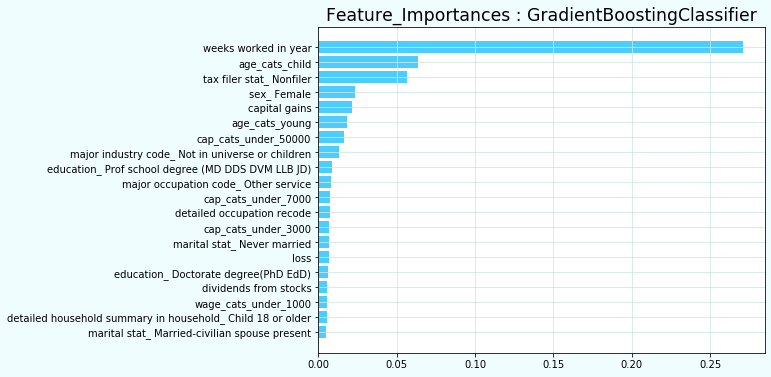

In [212]:
impotances = model.feature_importances_
feature_list = list(zip(model.feature_importances_,train.columns))
feature_list.sort(reverse=True)
feature_list=feature_list[:20]
feature_list.sort(reverse=False)
feature_df = pd.DataFrame(feature_list,columns=["score","feature"])
plt.figure(figsize=(8,6),facecolor="#F0FDFF")
plt.title("Feature_Importances : {}".format(str(model).split("(")[0]), fontsize="xx-large")
plt.barh(feature_df["feature"],feature_df["score"],color="#4CCDFF")
plt.grid(color="#CFE8E1")

In [453]:
pred = model.predict(test)

In [231]:
sub_predict = model.predict(test)
proba = model.predict_proba(test)
df = pd.DataFrame(proba)
print(sub_predict.sum())

sub_predict2 = model2.predict(test)
proba2 = model2.predict_proba(test)
df2 = pd.DataFrame(proba2)
print(sub_predict2.sum())

sub_predict3 = model3.predict(test)
proba3 = model3.predict_proba(test)
df3 = pd.DataFrame(proba3)
print(sub_predict3.sum())

sub_predict4 = model4.predict(test)
proba4 = model4.predict_proba(test)
df4 = pd.DataFrame(proba4)
print(sub_predict4.sum())

sub_predict5 = model5.predict(test)
proba5 = model5.predict_proba(test)
df5 = pd.DataFrame(proba5)
print(sub_predict5.sum())

sub_predict6 = model6.predict(test)
proba6 = model6.predict_proba(test)
df6 = pd.DataFrame(proba6)
print(sub_predict6.sum())

3529
3405.0
3256
3598
3088
3536


In [237]:
p_list = []
for p in df[1]:
    if p>0.8:
        p_list.append(1)
    else:
        p_list.append(0)
print("1 : ", sum(p_list))

p2_list = []
for p in df2[1]:
    if p>0.8:
        p2_list.append(1)
    else:
        p2_list.append(0)
print("2 : ", sum(p2_list))
p3_list = []
for p in df3[1]:
    if p>0.8:
        p3_list.append(1)
    else:
        p3_list.append(0)
print("3 : ", sum(p3_list))        
p4_list = []
for p in df4[1]:
    if p>0.8:
        p4_list.append(1)
    else:
        p4_list.append(0)        
print("4 : ", sum(p4_list))                
p5_list = []
for p in df5[1]:
    if p>0.8:
        p5_list.append(1)
    else:
        p5_list.append(0)         
print("5 : ", sum(p5_list))               
p6_list = []
for p in df6[1]:
    if p>0.8:
        p6_list.append(1)
    else:
        p6_list.append(0)         
print("6 : ", sum(p6_list))          

1 :  2993
2 :  1604
3 :  1335
4 :  1616
5 :  1242
6 :  1865


In [238]:
mer_list = []
for i in range(len(p_list)) :
    if p_list[i] == 1 or p2_list[i] == 1 or p3_list[i] == 1 or p4_list[i] == 1 or p5_list[i] == 1 or p6_list[i] == 1:
        mer_list.append(1)
    else :
        mer_list.append(0)
sum(mer_list)

3320

In [239]:
sub = pd.read_csv("./data/jc1c2/sampleSubmission.csv",index_col="ID")

In [240]:
sub["income"] = mer_list

In [241]:
sub.to_csv("shiba2.csv")